#### [boxplot 그래프]

In [1]:
# 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터 준비
file_path = r'C:\Users\KDP-43\Desktop\KDT_Pandas\과제\DATA\auto_mpg.csv'
dataDF = pd.read_csv(file_path)

In [3]:
# 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

#### 이상치 데이터 확인 w/ boxplot()

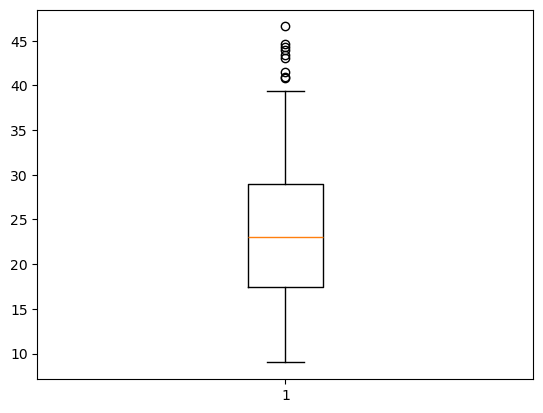

In [13]:
# 박스 그래프로 시각화

retDict = plt.boxplot( dataDF['mpg'], whis=1.0)       # 이상치 기준 whis 매개변수
plt.show()

In [14]:
# boxplot() 결과 객체 확인
for k,v in retDict.items():
    print("="*60)
    print(k,v)
    
    for _ in v:
        print(_.get_data())

whiskers [<matplotlib.lines.Line2D object at 0x00000208D643FC70>, <matplotlib.lines.Line2D object at 0x00000208D643FF10>]
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 39.4]))
caps [<matplotlib.lines.Line2D object at 0x00000208D62D11F0>, <matplotlib.lines.Line2D object at 0x00000208D62D1490>]
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([39.4, 39.4]))
boxes [<matplotlib.lines.Line2D object at 0x00000208D643F9D0>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians [<matplotlib.lines.Line2D object at 0x00000208D62D1730>]
(array([0.925, 1.075]), array([23., 23.]))
fliers [<matplotlib.lines.Line2D object at 0x00000208D62D19D0>]
(array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([43.1, 41.5, 46.6, 40.8, 44.3, 43.4, 44.6, 40.9, 44. ]))
means []


In [17]:
outlier = retDict['caps']
outlier[0].get_data()
outlier[1].get_data()

(array([0.9625, 1.0375]), array([39.4, 39.4]))

In [25]:
# 하위/상위 이상치 값 추출
outliers = retDict['caps']

low_outlier  = outlier[0].get_data()[1].tolist()[0]
up_outlier = outlier[1].get_data()[1].tolist()[0]

print(low_outlier , up_outlier, sep="\n")

9.0
39.4


In [27]:
# 이상치 처리
dataDF[ dataDF['mpg'] > low_outlier ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
dataDF[ dataDF['mpg'] < up_outlier ] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


##### boxplot 방향 조절

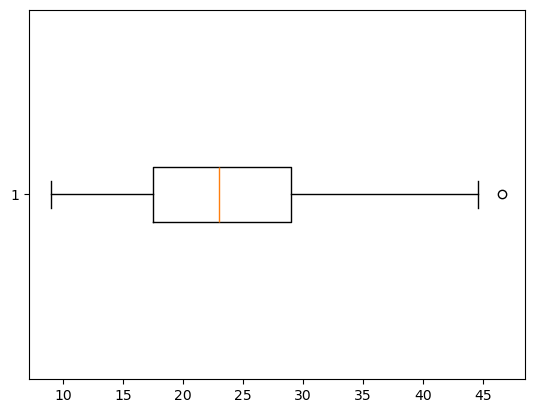

In [10]:
retDict = plt.boxplot( dataDF['mpg'] , vert=False)
plt.show()